In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column
import sympy as sym

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

0.376403 -0.676845


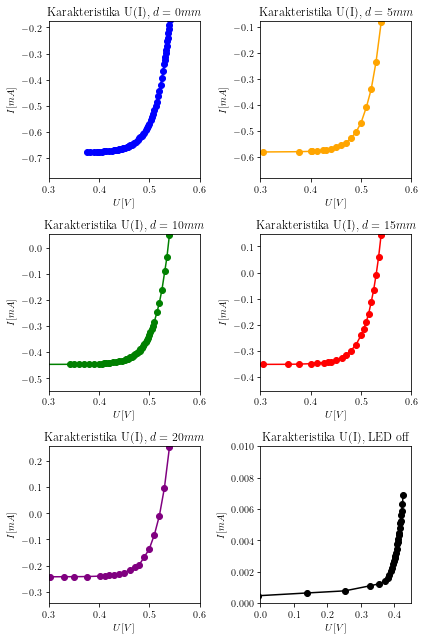

In [44]:
fig, ax = plt.subplots(3, 2, figsize=[6, 9])

meritve = ["meritve/00-SiDiod.txt", "meritve/01-SiDiod_5mm.txt", "meritve/02-SiDiod_10mm.txt",
          "meritve/03-SiDiod_15mm.txt", "meritve/04-SiDiod_20mm.txt"]

for data, axs, d, col in zip(meritve, ax.flatten(), ["$d = 0 mm$", "$d = 5 mm$", "$d = 10 mm$",
                                                     "$d = 15 mm$", "$d = 20 mm$"], 
                             ['blue', 'orange', 'green', 'red', 'purple']):
    dat = np.loadtxt(data)
    axs.plot(dat[:, 0], dat[:, 1], marker='o', color=f'{col}')
    
    I = dat[:, 1]
    axs.set_title(f'Karakteristika U(I), {d}')
    axs.set_xlabel(r'$U[V]$')
    axs.set_ylabel(r'$I[mA]$')
    axs.set_xlim(0.3, 0.6)
    I_0 = I[np.argmin(np.abs(dat[:, 0]))]
    axs.set_ylim(I_0 - 0.1, I_0 + 0.5)
    
data = np.loadtxt("meritve/characteristic-off.txt")
ax[2, 1].plot(data[:, 0], data[:, 1], marker = 'o', color = 'k' )
ax[2, 1].set_xlim(0, 0.45)
ax[2, 1].set_ylim(0, 0.01)
ax[2, 1].set_title(f'Karakteristika U(I), LED off')
ax[2, 1].set_xlabel(r'$U[V]$')
ax[2, 1].set_ylabel(r'$I[mA]$')

    
data = np.loadtxt("meritve/00-SiDiod.txt")
U = data[:, 0]
I = data[:, 1]

U_0 = U[np.argmin(np.abs(U))]
I_0 = I[np.argmin(np.abs(U))]

print(U_0, I_0)

fig.tight_layout()
fig.savefig("graf1.pdf")

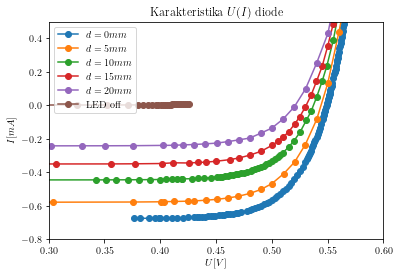

In [56]:
fig1, ax1 = plt.subplots()

meritve = ["meritve/00-SiDiod.txt", "meritve/01-SiDiod_5mm.txt", "meritve/02-SiDiod_10mm.txt",
          "meritve/03-SiDiod_15mm.txt", "meritve/04-SiDiod_20mm.txt", "meritve/characteristic-off.txt"]

for data, d in zip(meritve, [0, 5, 10, 15, 20, 0]):
    if data == "meritve/characteristic-off.txt":
        dat = np.loadtxt(data)
        ax1.plot(dat[:, 0], dat[:, 1], marker = 'o', label=f'LED off')
    else:
        dat = np.loadtxt(data)
        ax1.plot(dat[:, 0], dat[:, 1], marker='o', label=f'$d={d}mm$') 
    
ax1.set_title("Karakteristika $U(I)$ diode")
ax1.set_xlabel("$U[V]$")
ax1.set_ylabel("$I[mA]$")
ax1.legend()
ax1.set_xlim(0.3,  0.6)
ax1.set_ylim(-0.8, 0.5)
fig1.savefig("karakteristika.pdf")

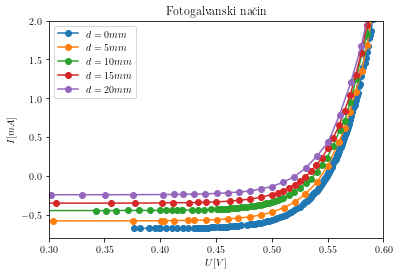

In [57]:
fig2, ax2 = plt.subplots()

meritve1 = ["meritve/10-SiDiod.txt", "meritve/11-SiDiod_5mm.txt", "meritve/12-SiDiod_10mm.txt",
          "meritve/13-SiDiod_15mm.txt", "meritve/14-SiDiod_20mm.txt"]

for data, d in zip(meritve, [0, 5, 10, 15, 20]):
    dat = np.loadtxt(data)
    ax2.plot(dat[:, 0], dat[:, 1], marker='o', label=f'$d={d}mm$')
    
ax2.set_title("Fotogalvanski način")
ax2.set_xlabel("$U[V]$")
ax2.set_ylabel("$I[mA]$")
ax2.legend()
ax2.set_xlim(0.3, 0.6)
ax2.set_ylim(-0.8, 2)
fig2.savefig("galvanski.pdf")

In [61]:
# Need to convert as current is in milliamps elswhere
I_0 = 1e-3 * -I[np.argmin(np.abs(U))]
ΔI_0 = 1e-3 * -I[np.argmin(np.abs(U)) -1] - I_0

χ, Δχ = 0.42, 0.01
ν, Δν = 0.75, 0.1
U_LED, ΔU_LED = 1.879, 0.001
I_LED, ΔI_LED = 23.31e-3, 0.05e-3

η = I_0 / (χ*ν * U_LED*I_LED)
Δη = np.sqrt(
    (1 / (χ*ν * U_LED*I_LED) * ΔI_0)**2 +
    (-I_0 / (χ**2 * ν * U_LED*I_LED) * Δχ)**2 +
    (-I_0 / (χ * ν**2 * U_LED*I_LED) * Δν)**2 +
    (-I_0 / (χ*ν * U_LED**2 * I_LED) * ΔU_LED)**2 +
    (-I_0 / (χ*ν * U_LED * I_LED**2) * ΔI_LED)**2
)
η, Δη

(0.04905797500642783, 1.156685815861416)

In [73]:
I_0 = 1e-3 * -I[np.argmin(np.abs(U))]

I_0 = unp.uarray([I_0], [0.00005])
print(I_0)
v = unp.uarray([0.75], [0.1])
x = unp.uarray([0.42], [0.01])
U_L = unp.uarray([1.879], [0.001])
I_L = unp.uarray([23.31e-3], [0.05e-3])

n = I_0 / (x * v * U_L * I_L)

n

[0.000676845+/-5e-05]


array([0.04905797500642783+/-0.007569353197413417], dtype=object)